### $\color{indianred}{\text{ДРУГА ВЈЕЖБА ИЗ АСТРОСТАТИСТИКЕ, датум: 28.2.2025.}} $

### Теоријски увод

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

$\blacksquare$ Монте Карло интеграција је техника заснована на генерисању великог броја случајних

узорака. Ако је интеграл облика:

$$
\int f(x)p(x)dx,
$$

и ако можемо да процијенимо $f(x)$ и узоркујемо $p(x)$, тада важи апроксимација:

$$
\int f(x)p(x)dx \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i),
$$

гдје су $x_i$ узорци из $p(x)$.

#### ПРИМЈЕР

$$
I = \int_{1}^{5} dx \frac{x^3 e^{-x} \cos(2x)}{1 + x^2}.
$$

Изаберемо униформну дистрибуцију као пондерисану функцију:

$$
p(x) = \frac{1}{5 - 1} = \frac{1}{4}, \quad \text{за } x \in [1,5].
$$ 

Тиме можемо записати:

$$
I = 4\int_{1}^{5} \frac{dx}{4}\cdot \frac{x^3 e^{-x} \cos(2x)}{1 + x^2}.
$$

Сада имамо да важи:

$$
p(x)=\frac{1}{4},\,f(x)=\frac{x^3 e^{-x} \cos(2x)}{1 + x^2}.
$$

Сљедећи кораци су:

1. генеришемо $N$ случајних бројева $x_i$ из униформне дистрибуције на интервалу $[1,5]$,

2. израчунавамо $f(x_i)$ за сваки $x_i$,

3. израчунавамо апроксимацију интеграла као:

$$
I \approx 4 \cdot \frac{1}{N} \sum_{i=1}^{N} f(x_i).
$$

Ова метода омогућава брзо приближно рјешење интеграла који би били тешки за класичне аналитичке

или нумеричке методе. Испод ћемо пробати да ријешимо наведени интеграл кратким кодом.

In [2]:
import numpy as np
from scipy import stats
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t as student_t
from matplotlib import pyplot as plt
import pylab as plb
from astropy.stats import median_absolute_deviation
from astroML import stats as astroMLstats

In [3]:
x_max = 5
x_min = 1

x_i = np.random.uniform(x_min, x_max, 100000)

def func(x):
    return (x**3 * np.exp(-x) * np.cos(2 * x))/(1 + x**2)

integral = (x_max - x_min) * np.mean(func(x_i))
print(np.round(integral, 6))

-0.118009


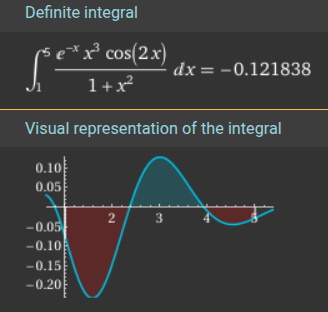

### Описна (дескриптивна) статистика. 

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Наш циљ је да процијенимо расподјелу вјероватноће на основу доступних експерименталних података,

чиме омогућавамо реконструкцију дистрибуције засноване на подацима. Произвољна дистрибуција 

може се описати путем параметара локације (који одређују положај), параметара скале (који дефинишу

распон или ширину), као и параметара облика. Ове величине представљају тзв. **описну статистику**, 

која квантитативно карактерише основне особине скупа података.

### Програмирање - 1. дио 

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Направићемо хистограм, слично као у прошлом ноутбуку.

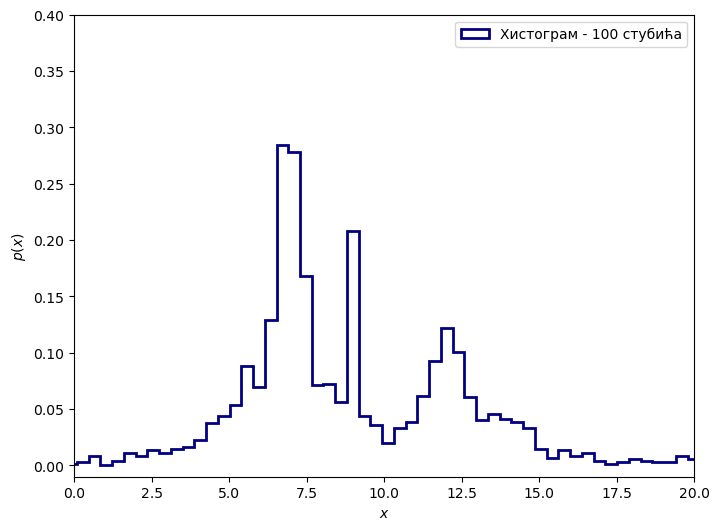

In [4]:
random_state = np.random.RandomState(seed=0) # генератор случајних бројева (важи репродуктивност)
N = 2000 # укупан број генерисаних података

mu_gamma_f = [(5, 1.0, 0.1), # листа од пет тројки
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]

hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x) # функција густине вјероватноће
                          for (mu, gamma, f) in mu_gamma_f])

# генерисање случајних промјењивих
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])

random_state.shuffle(x) # мијешање података

x = x[x > -15]
x = x[x < 25]

plt.figure(figsize=(8,6))
xgrid = np.linspace(-10, 30, 1000) # генерисање мреже тачака за цртање густине

plt.hist(x, density=True, color='navy', bins=100, histtype='step', lw=2, label='Хистограм - 100 стубића')
plt.ylabel('$p(x)$')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.xlim(0, 20)
plt.ylim(-0.01, 0.4001)
plt.show()

Средња вриједност узорка је:  

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i.
$$

Ово је *аритметичка средина узорка*, која произилази из *Монте Карло интеграције* као процјена

првог момента дистрибуције:

$$
\mu = E(x) = \langle x \rangle = \int_{-\infty}^{\infty} x h(x) \,dx \approx \frac{1}{N} \sum_{i=1}^{N} x_i.
$$

гдје су $\{x_i\}$ случајни узорци из нормализоване функције густине $h(x)$, а $E(\cdot)$ означава 

*математичко очекивање*.

In [5]:
data = x.copy() 
mean = np.mean(data)
median = np.median(data)
print(mean, median)

8.684569429144437 7.712683071767981


Неке расподјеле немају коначну очекивану вриједност (интеграл дивергира). У таквим 

случајевима медијана је поузданија процјена положаја дистрибуције, јер је мање осјетљива

на издвојене вриједности. Нпр. ако све вриједности изнад $50.$ перцентила (медијане) увећамо

$100$ пута или их замијенимо већим бројевима, средња вриједност би се значајно промијенила.

Насупрот томе, медијана и друге статистике засноване на поретку узорака остале би непромијењене.

Нешто слично показујемо у коду испод.

In [6]:
mask = data > 10
data2 = data.copy()
data2[mask] = 10000

new_median = np.median(data2)
new_mean = np.mean(data2)

print(median, new_median)
print(mean, new_mean)

7.712683071767981 7.712683071767981
8.684569429144437 3185.1766540644003


Поред средње вриједности, важна је анализа одступања од просјека, која карактерише

облик дистрибуције. Најједноставније је израчунати:

$$
d_i = x_i - \mu.
$$

Пошто је просечно одступање нула, користи се *средње апсолутно одступање* (MAD):

$$
\frac{1}{N} \sum |x_i - \mu|,
$$

али апсолутне вриједности могу сакрити реалну расподјелу података. Због тога се чешће

користи *варијанса*:

$$
\sigma^2 = \frac{1}{N} \sum (x_i - \mu)^2.
$$

Варијанса је математичко очекивање квадрата одступања:

$$
\sigma^2 = V = E((x - \mu)^2) = \int_{-\infty}^{\infty} (x - \mu)^2 h(x)dx.
$$

Стандардна девијација ($\sigma$) је коријен варијансе и примјењива је и на недискретне

дистрибуције, укључујући и оне које нису гаусијанске.

Постоји и *"медијанa апсолутно одступање"* (MAD), дато као $median(|x_i-median(\{x_i\}))$, гдје је

$\sigma=1.4826\,MAD$ за гаусијанску расподјелу.

In [7]:
var = np.var(data)
std = np.std(data)
print(var, std)
print(np.isclose(std**2,var)) # провјера, вриједности понекад нису скроз једнаке, па се узима неки интервал

MAD = median_absolute_deviation(data)
print(MAD, MAD*1.4826)

15.398407767466226 3.924080499615958
True
1.6697085582549134 2.4755099084687346


Квантил од $P\%$ (или $p$-ти проценат, $q_p$) дефинише се као:  

$$
\frac{p}{100} = H(q_p) = \int_{-\infty}^{q_p} h(x)dx.
$$

Пошто је укупан интеграл од $-\infty$ до $+\infty$ једнак $1$, вриједност 

$q_p$ означава праг испод којег се налази $p\%$ расподјеле.  

6.661074122722392 7.712683071767981 11.614821802596415


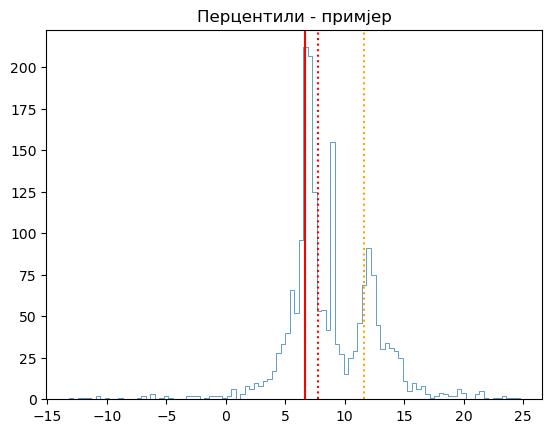

In [8]:
q25, q50, q75 = np.percentile(data, [25, 50, 75]) # примјер
print(q25, q50, q75)

plt.hist(data,bins=100,histtype='step', lw=0.5);

plt.axvline(np.percentile(data,25),c='red')
plt.axvline(np.percentile(data,50),c='red',ls='dotted')
plt.axvline(np.percentile(data,75),c='orange',ls='dotted')
plt.title('Перцентили - примјер')
plt.show()

Регион између $5.$ и $95.$ перцентила садржи $90\%$ узорака, што у Бајесовској статистици

одговара $90\%$ интервалу кредибилитета (вјеродостојности).  

Интерквартилни опсјег је разлика између $75.$ и $25.$ перцентила $q_{75} - q_{25}$.


Као и медијана, интерквартилни опсјег је робустнија процјена скале расподјеле од стандардне 

девијације. За гаусијан, на основу наведеног, дефинише се величина аналогна стандардној девијацији:  

$$
\sigma_G = 0.7413\cdot(q_{75} - q_{25})
$$

Ова нормализација чини процјену непристрасном, за савршену гаусијанску дистрибуцију. 

Медијана и $\sigma_G$ су мање осјетљиве на издвојене вредности, али захтијевају сортирање података,

што их чини рачунарски захтјевнијим у поређењу са $mean$ и $std$.

In [9]:
print(astroMLstats.sigmaG(data), np.std(data)) # оригинални подаци
print(astroMLstats.sigmaG(data2), np.std(data2)) # присутне издвојене вриједности
 
%timeit np.mean(data), np.std(data) # просјечно вријеме извршавања кода током више итерација
%timeit np.median(data), astroMLstats.sigmaG(data)

3.6722186500491025 3.924080499615958
7408.073230892021 4654.170152600303
26.7 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
176 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Мода је највјероватнија вриједност, одређена као максимум функције густине:

$$
\left( \frac{dh(x)}{dx} \right)_{x_m} = 0.
$$

Приближна вриједност моде, ако је дистрибуција близу гаусијанске, дата је изразом:  

$$
x_m = 3q_{50} - 2\mu.
$$

In [10]:
mode = 3 * q50 - 2 * mean
print(mode, mean, median)

5.76891035701507 8.684569429144437 7.712683071767981


Важни су моменти вишег реда: искошеност и зашиљеност. Искошеност (*skewness*) је дата са:

$$
\Sigma = \int_{-\infty}^{\infty} \left( \frac{x - \mu}{\sigma} \right)^3 h(x)dx,
$$

и мјери *асиметрију* расподјеле. Дуге десне репове карактерише позитивна вриједност $\Sigma$.  

Зашиљеност (*kurtosis*) је дата преко:

$$
K = \int_{-\infty}^{\infty} \left( \frac{x - \mu}{\sigma} \right)^4 h(x)dx - 3,
$$

а она описује колико је расподјела "оштра" или "пљосната". Позитивне вриједности указују на уску

и високу расподјелу, док негативне означавају пљоснатији облик. Корекција са $3$ осигурава да за 

гаусијанску дистрибуцију важи $K = 0$.

In [11]:
skew = stats.skew(data)
kurt = stats.kurtosis(data)
print(skew, kurt)

-0.19452258652721546 3.880994636362069


**Сумирано, ево дескриптивне статистике за нашу расподјелу:**

In [12]:
print('локација: ', mean, median, mode)
print('скала: ', var, std, astroMLstats.sigmaG(data))
print('облик: ', skew, kurt)
print('неки перцентили: ', q25, q50, q75)

локација:  8.684569429144437 7.712683071767981 5.76891035701507
скала:  15.398407767466226 3.924080499615958 3.6722186500491025
облик:  -0.19452258652721546 3.880994636362069
неки перцентили:  6.661074122722392 7.712683071767981 11.614821802596415


### Статистика узорка и популације

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Статистике изведене из података су **узорачке статистике**, док су **популационе статистике** 

дефинисане на основу познате густине вкероватноће.  

Средња вриједност популације је $\mu$, али је непозната, па се процјењује средњом вриједношћу узорка:  

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i.
$$

Умјесто популационе варијансе $\sigma^2$, користимо варијансу узорка са Беселовом корекцијом ($N-1$):  

$$
s^2 = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2.
$$

При великим вриједностима $N$, ова корекција постаје занемарљива.

---

Несигурност процјене $\bar{x}$ је стандардна грешка средње вриједности:

$$
\sigma_{\bar{x}} = \frac{s}{\sqrt{N}}.
$$

Несигурност саме варијансе дата је преко:  

$$
\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}} \sqrt{\frac{N}{N-1}} \sigma_x.
$$

За квантиле, стандардна грешка квантилa је:  

$$
\sigma_{q_p} = \frac{1}{h_p} \sqrt{\frac{p(1 - p)}{N}}
$$

где је $p$ вриједност процента.

---

Ако желимо да параметризујемо податке, потребна нам је одговарајућа расподјела. Једна од основних је

униформна расподјела, позната и као „правоугаона“. Дефинисана је параметрима средње вриједности $\mu$

и ширине $W$, са функцијом густине:  

$$
p(x | \mu, W) = \frac{1}{W},
$$

за интервал $|x - \mu| \leq \frac{W}{2}$, а нула изван њега.  

Стандардна девијација униформне дистрибуције је $\sigma = \frac{W}{\sqrt{12}}$.

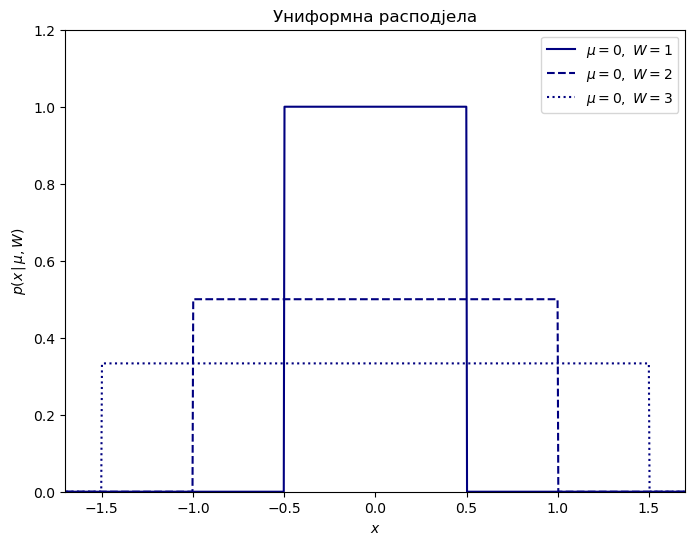

In [13]:
W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-2, 2, 1000)

plt.figure(figsize=(8,6))

for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W
    dist = uniform(left, W)

    plt.plot(x, dist.pdf(x), ls=ls, c='navy',
             label=r'$\mu=%i,\ W=%i$' % (mu, W))

plt.xlim(-1.7, 1.7)
plt.ylim(0, 1.2)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x\,|\,\mu, W)$')
plt.title('Униформна расподјела')

plt.legend()
plt.show()

Можемо генерисати насумичне узорке из униформне расподјеле и израчунати густину 

вјероватноће у одређеној тачки.

Функције $pdf(x)$ враћа вриједност функције густине вјероватноће на датој тачки $x$.

Униформна расподјела $U(a, b)$ има $\text{PDF}$:

$$
  p(x) =
  \begin{cases}
  \frac{1}{b - a}, & a \leq x \leq b \\
  0, & \text{иначе}
  \end{cases}
$$

Пошто су границе $a = -1$ и $b = 1$, ширина је $W = b - a = 1 - (-1) = 2$, па имамо:

$$
p(x) = \frac{1}{2},\,\, \text{за}\,\, x \in [-1,1]
$$

Треба нам $p(1)$:

- ако је $\text{pdf}(1)=0.5$, тада је $1$ унутар интервала $[-1,1]$ и расподјела је у реду,

- ако је $\text{pdf}(1)=0$, то значи да је тачка $1$ изван граница (нпр. $U(-1,2)$).

In [44]:
N = 100 # број узорака
distU = uniform(-1, 2) # доња граница, ширина интервала
draws = distU.rvs(N) # генерисање случајних узорака
print(draws[:4])

p = distU.pdf(1) # густина вјероватноће
print(p)

p = distU.cdf(1) # pdf за x=1
print(p)

[-0.26604995 -0.51975337 -0.45883772 -0.55566743]
0.5
1.0


### Гаусова расподјела

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Функција густине вероватноће за нормалну дистрибуцију је:  

$$
p(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left( \frac{-(x - \mu)^2}{2\sigma^2} \right).
$$

Означава се као $\mathcal{N} (\mu, \sigma)$.

Конволуција два гаусијана $\mathcal{N} (\mu_1, \sigma_1)$ и $\mathcal{N} (\mu_2, \sigma_2)$ даје нови:

$$
\mathcal{N} (\mu_1 + \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2}).
$$

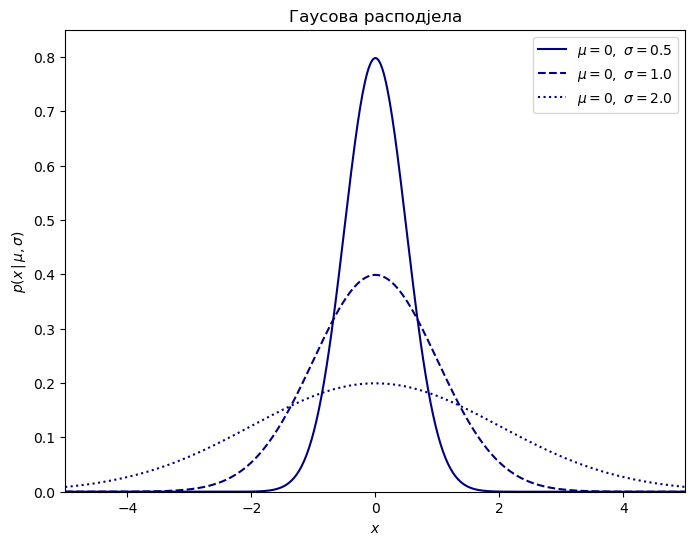

In [14]:
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(8,6))

for sigma, ls in zip(sigma_values, linestyles):

    dist = norm(mu, sigma)
    plt.plot(x, dist.pdf(x), ls=ls, c='navy',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x\,|\,\mu,\sigma)$')
plt.title('Гаусова расподјела')
plt.legend()
plt.show()

[ 93.46074835 103.11297059 118.26153172 122.28126878]
5.940600124901435e-12


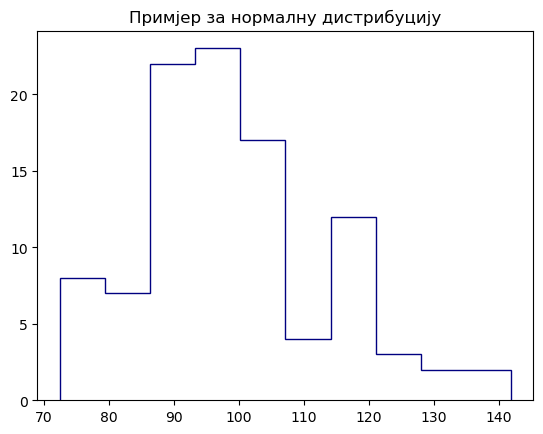

In [15]:
distG = norm(loc =100 , scale=15) # нормална расподјела 𝑁(100,15)
draws = distG.rvs(100) # генерисање случајних вриједности
p = distG.pdf(0) # густина вјероватноће у x=0
print(draws[:4])
print(p)

plt.hist(draws, histtype='step', color='navy')
plt.title('Примјер за нормалну дистрибуцију')
plt.show()

Да се подсјетимо, кумулативна функција расподјеле (*CDF*) дефинисана је као:

$$
\text{cdf}(x | \mu, \sigma) = \int_{-\infty}^{x} p(x' | \mu, \sigma) dx',
$$

и наравно важи:  $\text{cdf}(\infty) = 1.$

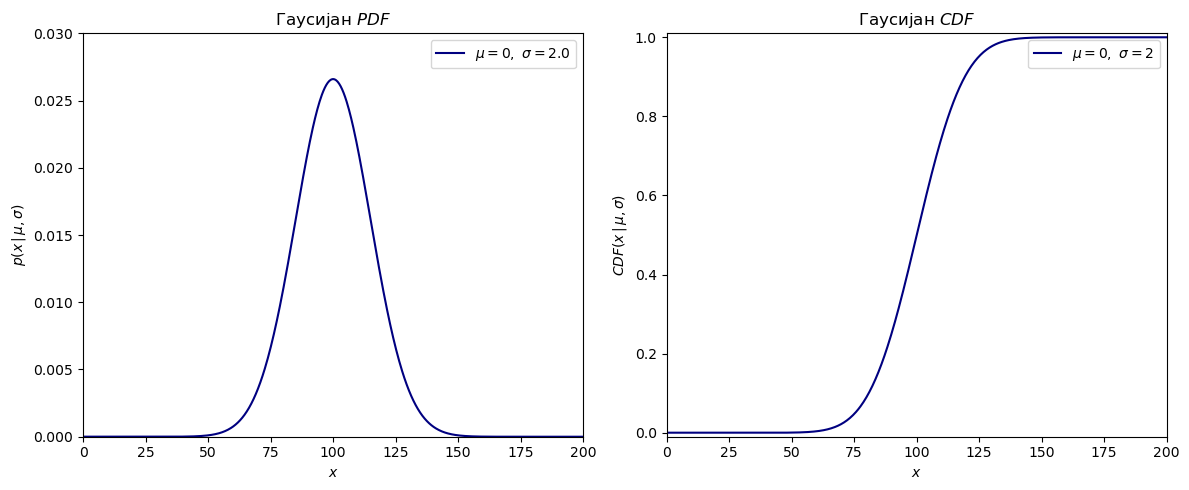

In [16]:
xgrid = np.linspace(-100, 200, 1000)
gaussPDF = distG.pdf(xgrid) # низ PDF вриједности
gaussCDF = distG.cdf(xgrid) # низ CDF вриједности

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(xgrid, gaussPDF, ls='-', c='navy', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x\,|\,\mu,\sigma)$')
plt.title(r'Гаусијан $PDF$')
plt.legend()

plt.subplot(122)
plt.plot(xgrid, gaussCDF, ls='-', c='navy', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x\,|\,\mu,\sigma)$')
plt.title(r'Гаусијан $CDF$')
plt.legend()

plt.tight_layout()
plt.show()

Вјероватноћа да се вриједност узоркована из гаусијана налази у интервалу $\mu - a$ до $\mu + b$ дата је:  

$$
\int_{\mu - a}^{\mu + b} p(x | \mu, \sigma) dx.
$$

- за \( a = b = 1\sigma \) добијамо $68.3\%$ интервала,

- за \( a = b = 2\sigma \) интервал садржи $95.4\%$,

- за \( a = b = 3\sigma \) интервал покрива $99.7\%$.  

Ови интервали $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, $\mu \pm 3\sigma$ су границе повјерења.

За негаусовске дистрибуције, $1\sigma$ интервал често одговара квантилном опсјегу између $16\%$ и $84\%$.

In [17]:
upper = distG.cdf(100+15)
lower = distG.cdf(100-15)
p = upper-lower
print(p)

upper = distG.cdf(100+4*15) # између -2 сигма и 4 сигма
lower = distG.cdf(100-2*15)
p = upper-lower
print(p)

0.6826894921370859
0.9772181968099877


Aко је $x$ нормално расподијељено као $\mathcal{N}(\mu, \sigma)$, тада ће $y = \exp(x)$ пратити 

тзв. "лог-нормалну" дистрибуцију.  

- средња вриједност:  
$$
  E(y) = e^{\mu + \sigma^2 / 2}
$$
- медијана:  
$$
  \text{med}(y) = e^{\mu}
$$
- мода:  
$$
  \text{mod}(y) = e^{\mu - \sigma^2}
$$

In [24]:
distLN = norm(0,1) # 𝑁(0,1)
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5 * 1), y.mean())

1.6487212707001282 1.6467466461538982


### $\chi^2$ расподјела

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

$\chi^2$ расподјела се јавља у контексту максималне вјероватноће и статистичког тестирања.  

Ако су $x_i$ вредности из гаусовске расподјеле, онда стандардизоване вриједности:  

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

и њихов збир квадрата:  

$$
Q = \sum_{i=1}^{N} z_i^2
$$

прате $\chi^2$ расподјелу са $k = N$ степени слободе.  

Функција густине вјероватноће (\text{PDF}) за $\chi^2$ расподелу је:  

$$
p(Q\,|\,k) \equiv \chi^2(Q\,|Q,k) = \frac{1}{2^{k/2} \Gamma(k/2)} Q^{k/2 - 1} e^{Q/2},
$$

гдје је $\Gamma$ Гама функција.  

$\chi^2$ зависи само од $N = k$, а не од $\mu$ или $\sigma$.

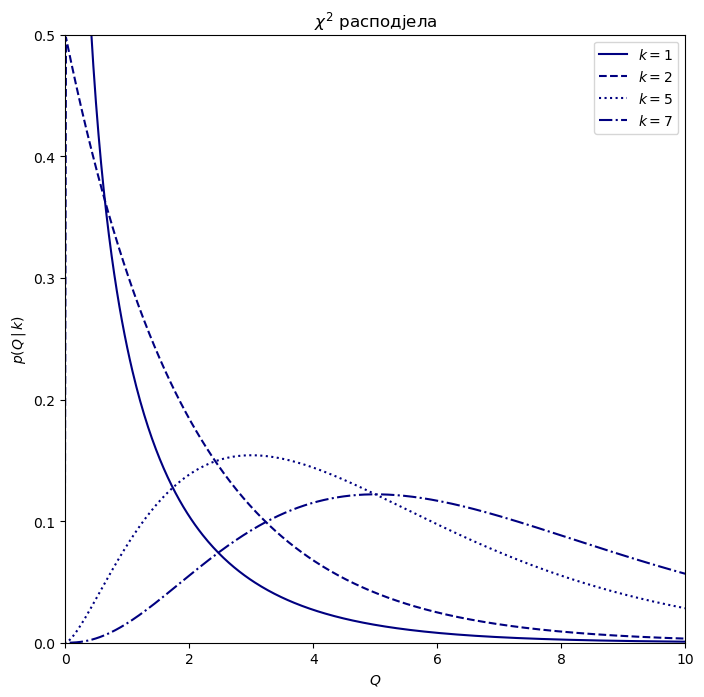

In [19]:
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='navy',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q\,|\,k)$')
plt.title(r'$\chi^2\ \mathrm{расподјела}$')

plt.legend()
plt.show()

### Поасонова расподјела

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />



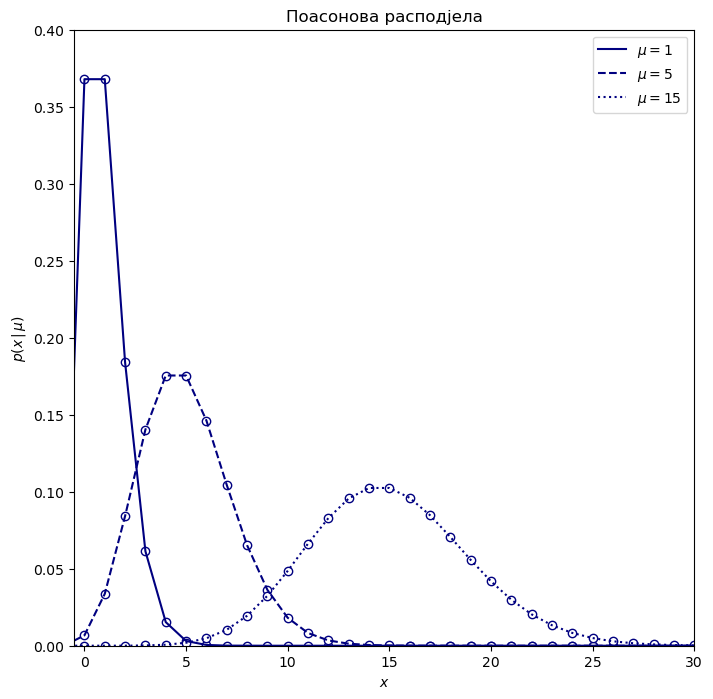

In [20]:
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

fig, ax = plt.subplots(figsize=(8,8))

for mu, ls in zip(mu_values, linestyles):

    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), color='navy',
             linestyle=ls,
             label=r'$\mu=%i$' % mu)

    plt.scatter(x, dist.pmf(x), edgecolor='navy',facecolor='white')
    
plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x\,|\,\mu)$')
plt.title('Поасонова расподјела')

plt.legend()
plt.show()

### Студентова $t$ расподјела

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />



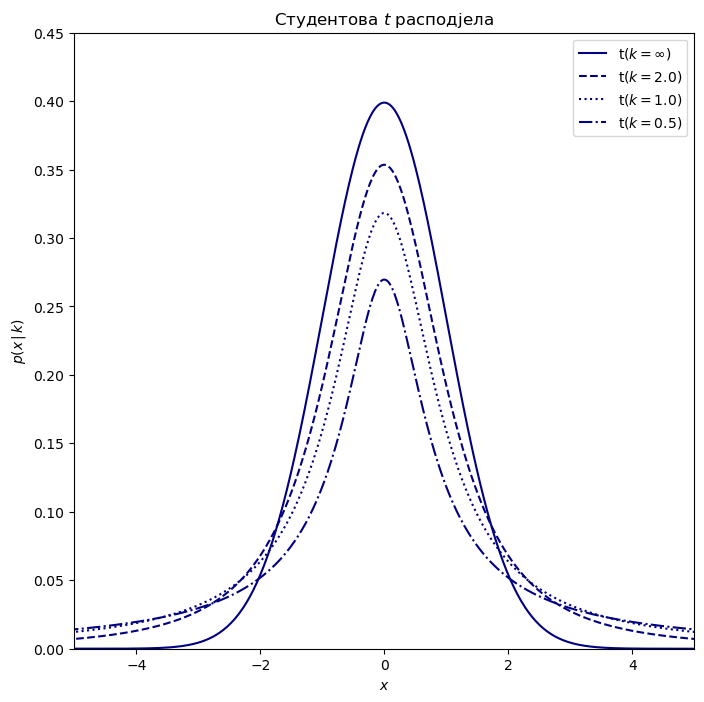

In [21]:
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize=(8,8))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='navy', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x\,|\,k)$')
plt.title(r'Студентова $t$ расподјела')

plt.legend()
plt.show()